In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Automatic Differentation and Gradients

tf.Tensor(6.0, shape=(), dtype=float32)


In [3]:
w = tf.Variable(tf.random.normal((3,2), name='w'))
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1.0, 2.0, 3.0]]

print(w.numpy())
print(b.numpy())

with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)

[dl_dw, dl_db] = tape.gradient(loss, [w,b])

print(w.shape)
print(w.numpy())
print(dl_dw.shape)
print(dl_dw.numpy())

my_vars = {
    'w' : w,
    'b' : b
}

grad = tape.gradient(loss,my_vars)
grad['b']

[[-0.11633541  0.96181154]
 [ 1.3043921  -2.449863  ]
 [ 0.6238447  -0.5631668 ]]
[0. 0.]
(3, 2)
[[-0.11633541  0.96181154]
 [ 1.3043921  -2.449863  ]
 [ 0.6238447  -0.5631668 ]]
(3, 2)
[[  4.3639827  -5.627415 ]
 [  8.727965  -11.25483  ]
 [ 13.091948  -16.882246 ]]


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 4.3639827, -5.627415 ], dtype=float32)>

In [5]:
layer = tf.keras.layers.Dense(2, activation='relu')
x= tf.constant([[1.0, 2.0, 3.0]])

with tf.GradientTape() as tape:
    # forward pass
    y = layer(x)
    loss = tf.reduce_mean(y**2)

grad = tape.gradient(loss, layer.trainable_variables)

for var, g in zip(layer.trainable_variables, grad):
    print(f'{var.name}, shape: {g.shape}')

dense_1/kernel:0, shape: (3, 2)
dense_1/bias:0, shape: (2,)


In [18]:
a, y = tf.constant(2.0), tf.constant(8.0)
x = tf.Variable(10.0)

loss= tf.math.abs(a * x - y)

print(loss)

tf.Tensor(12.0, shape=(), dtype=float32)


In [19]:
def train_func():
    with tf.GradientTape() as tape1:
        loss1 = tf.math.abs(a * x - y)
        print(loss1.numpy())

    dx = tape1.gradient(loss1,x)
    print('x = {}, dx = {:.2f}'.format(x.numpy(), dx))

    x.assign(x - dx)


for i in range(6):
    train_func()

12.0
x = 10.0, dx = 2.00
8.0
x = 8.0, dx = 2.00
4.0
x = 6.0, dx = 2.00
0.0
x = 4.0, dx = 0.00
0.0
x = 4.0, dx = 0.00
0.0
x = 4.0, dx = 0.00


In [20]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

    dy_dx = tape.gradient(y,x)
    dy_dx.numpy()

print(dy_dx)


tf.Tensor(6.0, shape=(), dtype=float32)


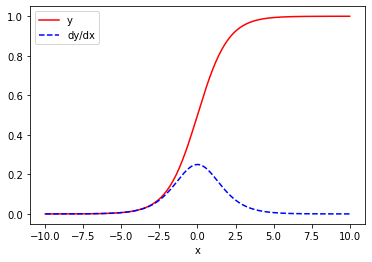

[]

In [28]:
#Derivative of Sigmoid function

x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y,x)

plt.plot(x,y,'r-',label='y')
plt.plot(x,dy_dx,'b--',label='dy/dx')

plt.legend()
_ = plt.xlabel('x')

plt.show()


[var.name for var in tape.watched_variables()]

In [29]:
# Trainable
x0 = tf.Variable(3.0,name='x0')
# Not Trainable
x1 = tf.Variable(3.0,name='x1', trainable=False)
# Variable + Tensor = Tensor
x2 = tf.Variable(2.0,name='x2') + 1.0
# Not a Variable
x3 = tf.constant(3.0,name='x3')

with tf.GradientTape() as tape:
    y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y,[x0,x1,x2,x3])

for g in grad:
    print(g)

[var.name for var in tape.watched_variables()]

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


['x0:0']

In [30]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**2

dy_dx = tape.gradient(y,x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [28]:
x0 = tf.Variable(3.141592)
x1 = tf.Variable(0.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
    # record certain variables to tape
    tape.watch(x0)
    tape.watch(x1)

    # define function
    y0 = tf.math.sin(x0)
    y1 = tf.math.sin(x1)

    # use that function to create another function
    y = ( y0 + y1 )* 2

    ys = 2 * y
    # Still have no idea what this step does
    # ys = tf.reduce_sum(y)

# calculate gradiaent relative to x0 and x1.
# what change in x0 causese y to change in certain amount?
grad = tape.gradient(ys, {'x0': x0, 'x1': x1})

print('dy/dx0', grad['x0'].numpy())
print('dy/dx1', grad['x1'].numpy())

dy/dx0 -4.0
dy/dx1 4.0


In [29]:
# control flow

x = tf.constant(1.0)

v0 = tf.Variable(2.0)
v1 = tf.Variable(2.0)

# persistant = True ensures all operations to be recorded.
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    if x > 0.0:
        result = v0
    else:
        result = v1**2

dv0, dv1 = tape.gradient(result, [v0,v1])

print(dv0)
print(dv1)
# gradient only connects to the variable that was used before.

tf.Tensor(1.0, shape=(), dtype=float32)
None


In [50]:
# When Getting a gradient of None, Check these:

x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    z = y * y

print(tape.gradient(z,x))

# When target is not connected, will get a gradient of None.

None


In [39]:
# When replaced a variable with a tensor

x = tf.Variable(2.0)

for epoch in range(3):
    with tf.GradientTape() as tape:
        y = x + 1

    print(type(x).__name__, ":", tape.gradient(y,x))

    # this will cause error
    # x = x + 1

    # correct way to implement
    x.assign_add(1)

ResourceVariable : tf.Tensor(1.0, shape=(), dtype=float32)
ResourceVariable : tf.Tensor(1.0, shape=(), dtype=float32)
ResourceVariable : tf.Tensor(1.0, shape=(), dtype=float32)


In [42]:
# calculation outside tensorflow will cause an error

x = tf.Variable([[1.0, 2.0],[3.0, 4.0]], dtype=tf.float32)

with tf.GradientTape() as tape:
    x2 = x**2

    # this step is calculated with numpy
    # y = np.mean(x2, axis=0)

    # when calculated with tensorflow, it will work fine
    y = tf.reduce_mean(x2, axis=0)


    y = tf.reduce_mean(y, axis=0)

print(tape.gradient(y,x))

tf.Tensor(
[[0.5 1. ]
 [1.5 2. ]], shape=(2, 2), dtype=float32)


In [43]:
# Taking gradients with integer or string
# it is obvious that taking gradient with string is impossible,
# but integer also makes it impossible.

x = tf.constant(10)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x

print(tape.gradient(y,x))

None


In [51]:
# taking gradients through a stateful object

# tf.tensor is immutable. can't change once it's created
# it has a 'value' but no 'state'

# tf.Variable has internal state.

x0 = tf.Variable(3.0)
x1 = tf.Variable(0.0)

with tf.GradientTape() as tape:
    # x1.assign_add(x0)
    y = (x1 + x0)**2

print(tape.gradient(y,x0))

tf.Tensor(6.0, shape=(), dtype=float32)


In [53]:
# non - differentiable VS no gradient registered?

image = tf.Variable([[[0.5,0.0,0.0]]])
delta = tf.Variable(0.1)

with tf.GradientTape() as tape:
    new_image = tf.image.adjust_contrast(image,delta)

try:
    print(tape.gradient(new_image,[image,delta]))
    assert False
except LookupError as e:
    print(f'{type(e).__name__}: {e}')

LookupError: gradient registry has no entry for: AdjustContrastv2


In [4]:
#using zeros instead of None

x = tf.Variable([2.0, 2.0])
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    z = y**2

print(tape.gradient(z,x,unconnected_gradients=tf.UnconnectedGradients.ZERO))

tf.Tensor([0. 0.], shape=(2,), dtype=float32)
